In [ ]:
# how the cofficeints gets affected 

In [6]:
from sklearn.datasets import load_diabetes

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [61]:
item=load_diabetes()

In [62]:
item

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [63]:
df=pd.DataFrame(item.data ,columns=item.feature_names)

In [64]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018114  0.044485  
439 -0.011080 -0.046883  0.015491  
440  0.026560  0.044529 -0.025930  
441 -0.039493 -0.004222  0.003064  

[442 rows x 10 columns]

In [65]:
df['Target']=item.target

In [66]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(item.data,item.target ,test_size=.2)

In [69]:
r2_scores=[]
coefs=[]
alpha=[0,.1,1,10]

for i in  alpha:
    reg=Lasso(alpha=i)
    reg.fit(x_train,y_train) 
    y_pred = reg.predict(x_test) 
    coefs.append(reg.coef_.tolist())
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

In [70]:
r2_scores

[0.42547170636520837,
 0.4384348074789519,
 0.36129699538939597,
 -0.014981838066835174]

In [71]:
coefs

[[-17.765909172126197,
  -314.40712630150006,
  500.1682852174411,
  353.9619423957291,
  -872.4198531483837,
  612.030430867128,
  50.254493600370765,
  116.96901446861587,
  760.8454143892556,
  100.46737957228534],
 [-0.0,
  -225.03139524147647,
  504.21465397454693,
  300.79094089161333,
  -12.464452277716836,
  -0.0,
  -269.8995346170745,
  0.0,
  437.31076169599527,
  65.97503750568873],
 [0.0,
  -0.0,
  381.24922133506414,
  19.375614379818526,
  0.0,
  0.0,
  -0.0,
  0.0,
  308.2110930549208,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0]]

Text(0.5, 1.0, 'alpha=10,r2_scores=-0.01')

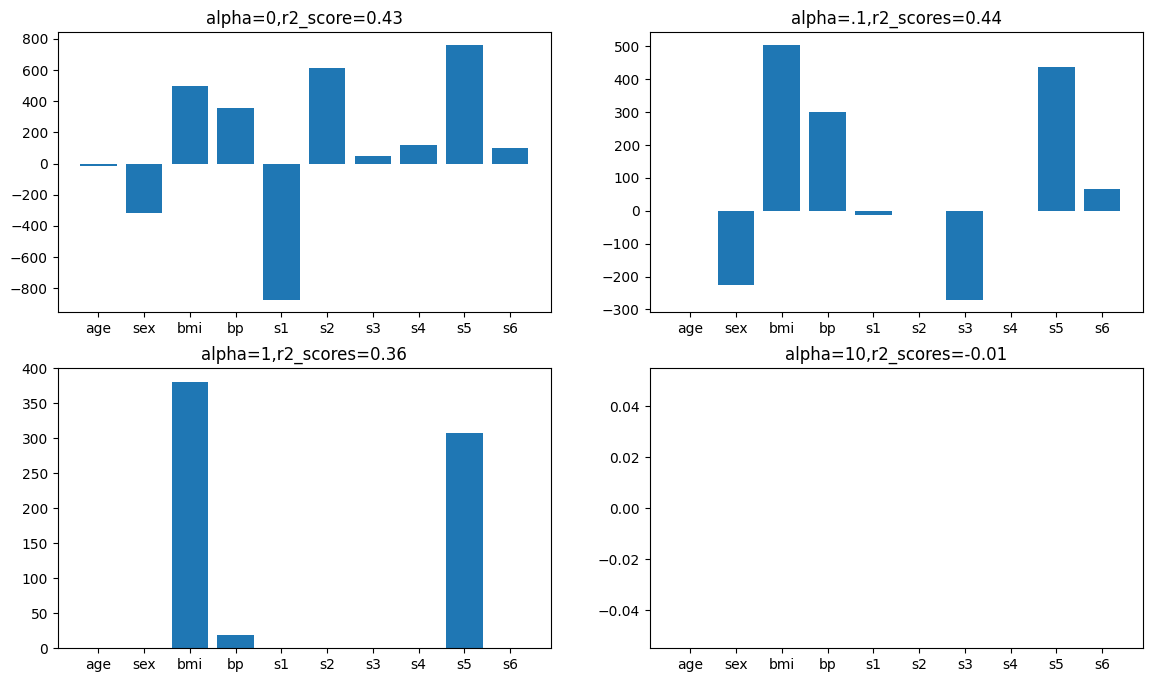

In [72]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.bar(item.feature_names,coefs[0])
plt.title('alpha=0,r2_score={}'.format(round(r2_scores[0],2)))


plt.subplot(222)
plt.bar(item.feature_names,coefs[1])
plt.title('alpha=.1,r2_scores={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(item.feature_names,coefs[2])
plt.title('alpha=1,r2_scores={}'.format(round(r2_scores[2],2)))


plt.subplot(224)
plt.bar(item.feature_names,coefs[3])
plt.title('alpha=10,r2_scores={}'.format(round(r2_scores[3],2)))




In [73]:
# higher cofficients are impacted more 

In [91]:
alpha=[0,.00001,.0001,.001,.01,.1,1,10,100,1000]

coefs=[]

for i in alpha:
    las=Lasso(alpha=i)
    las.fit(x_train,y_train)
    coefs.append(las.coef_.tolist())

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

In [92]:
coefs

[[-17.765909172126197,
  -314.40712630150006,
  500.1682852174411,
  353.9619423957291,
  -872.4198531483837,
  612.030430867128,
  50.254493600370765,
  116.96901446861587,
  760.8454143892556,
  100.46737957228534],
 [-17.75366850955791,
  -314.39682768692126,
  500.1724756108003,
  353.9507853127863,
  -871.642711775609,
  611.4243287084365,
  49.888812476212514,
  116.84221490453172,
  760.5697635247053,
  100.46713853382526],
 [-17.643496408548707,
  -314.30413336377745,
  500.21020012895735,
  353.8503642918273,
  -864.6473005462925,
  605.9685043163247,
  46.59718021526355,
  115.70088488583589,
  758.0884921631231,
  100.46497177274158],
 [-16.541903444220445,
  -313.37733182249843,
  500.5872162941392,
  352.84630583895637,
  -794.7169469187878,
  551.4291393297951,
  13.69133309012287,
  104.29037893348932,
  733.2844064735891,
  100.44325023360473],
 [-7.685896954214877,
  -302.3332896518837,
  505.9227765540535,
  344.6628771339687,
  -346.0871534019454,
  186.6312502334363

In [93]:
input_array=np.array(coefs)

In [94]:
input_array

array([[ -17.76590917, -314.4071263 ,  500.16828522,  353.9619424 ,
        -872.41985315,  612.03043087,   50.2544936 ,  116.96901447,
         760.84541439,  100.46737957],
       [ -17.75366851, -314.39682769,  500.17247561,  353.95078531,
        -871.64271178,  611.42432871,   49.88881248,  116.8422149 ,
         760.56976352,  100.46713853],
       [ -17.64349641, -314.30413336,  500.21020013,  353.85036429,
        -864.64730055,  605.96850432,   46.59718022,  115.70088489,
         758.08849216,  100.46497177],
       [ -16.54190344, -313.37733182,  500.58721629,  352.84630584,
        -794.71694692,  551.42913933,   13.69133309,  104.29037893,
         733.28440647,  100.44325023],
       [  -7.68589695, -302.33328965,  505.92277655,  344.66287713,
        -346.0871534 ,  186.63125023, -170.99777716,   60.07691688,
         569.41684344,   98.6910438 ],
       [  -0.        , -225.03139524,  504.21465397,  300.79094089,
         -12.46445228,   -0.        , -269.89953462,    0

In [95]:
coef_df=pd.DataFrame(input_array,columns=item.feature_names)

In [96]:
coef_df

age         sex         bmi          bp          s1          s2  \
0 -17.765909 -314.407126  500.168285  353.961942 -872.419853  612.030431   
1 -17.753669 -314.396828  500.172476  353.950785 -871.642712  611.424329   
2 -17.643496 -314.304133  500.210200  353.850364 -864.647301  605.968504   
3 -16.541903 -313.377332  500.587216  352.846306 -794.716947  551.429139   
4  -7.685897 -302.333290  505.922777  344.662877 -346.087153  186.631250   
5  -0.000000 -225.031395  504.214654  300.790941  -12.464452   -0.000000   
6   0.000000   -0.000000  381.249221   19.375614    0.000000    0.000000   
7   0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
8   0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
9   0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

           s3          s4          s5          s6  
0   50.254494  116.969014  760.845414  100.467380  
1   49.888812  116.842215  760.569764  100.467139  
2   46.597180  115.700885  758.088492  100.464972  
3   13.691333  104.290379  733.284406  100.443250  
4 -170.997777   60.076917  569.416843   98.691044  
5 -269.899535    0.000000  437.310762   65.975038  
6   -0.000000    0.000000  308.211093    0.000000  
7   -0.000000    0.000000    0.000000    0.000000  
8   -0.000000    0.000000    0.000000    0.000000  
9   -0.000000    0.000000    0.000000    0.000000

In [97]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=item.feature_names)
coef_df['alpha'] = alpha
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.00000    -17.765909 -314.407126  500.168285  353.961942 -872.419853   
0.00001    -17.753669 -314.396828  500.172476  353.950785 -871.642712   
0.00010    -17.643496 -314.304133  500.210200  353.850364 -864.647301   
0.00100    -16.541903 -313.377332  500.587216  352.846306 -794.716947   
0.01000     -7.685897 -302.333290  505.922777  344.662877 -346.087153   
0.10000     -0.000000 -225.031395  504.214654  300.790941  -12.464452   
1.00000      0.000000   -0.000000  381.249221   19.375614    0.000000   
10.00000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.00000   0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5          s6  
alpha                                                                   
0.00000     612.030431   50.254494  116.969014  760.845414  100.467380  
0.00001     611.424329   49.888812  116.842215  760.569764  100.467139  
0.00010     605.968504   46.597180  115.700885  758.088492  100.464972  
0.00100     551.429139   13.691333  104.290379  733.284406  100.443250  
0.01000     186.631250 -170.997777   60.076917  569.416843   98.691044  
0.10000      -0.000000 -269.899535    0.000000  437.310762   65.975038  
1.00000       0.000000   -0.000000    0.000000  308.211093    0.000000  
10.00000      0.000000   -0.000000    0.000000    0.000000    0.000000  
100.00000     0.000000   -0.000000    0.000000    0.000000    0.000000  
1000.00000    0.000000   -0.000000    0.000000    0.000000    0.000000

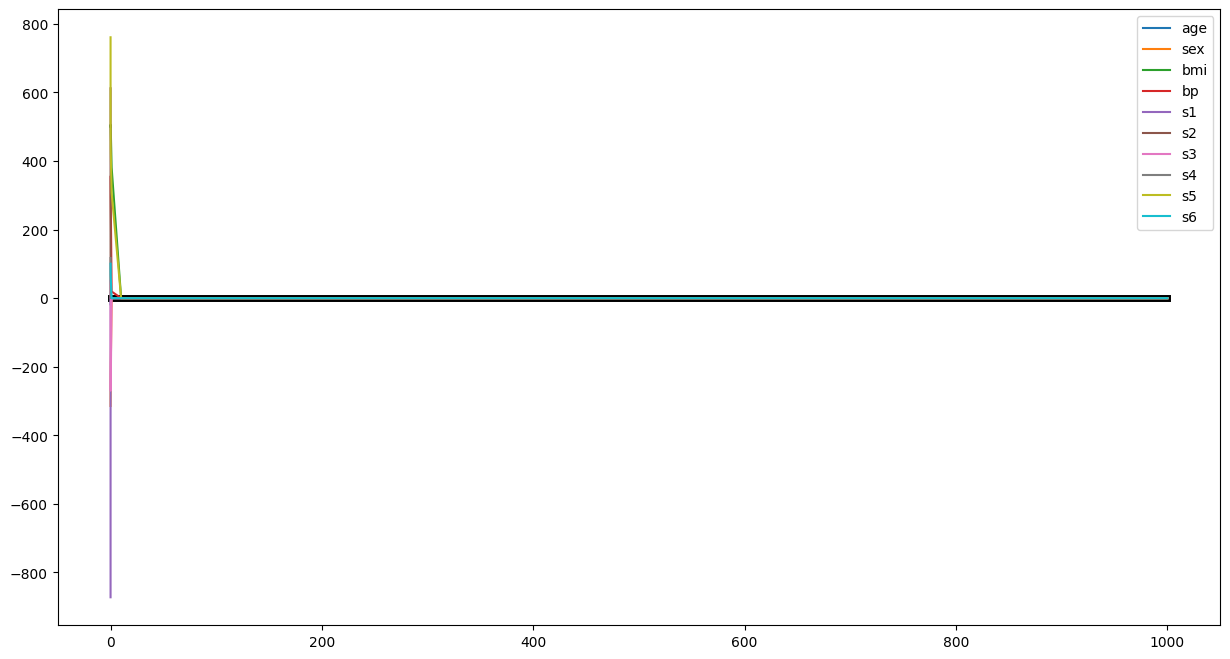

In [98]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alpha,np.zeros(len(alpha)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alpha,input_array[i],label=item.feature_names[i])
plt.legend()

In [99]:
#  impact on bias variance 

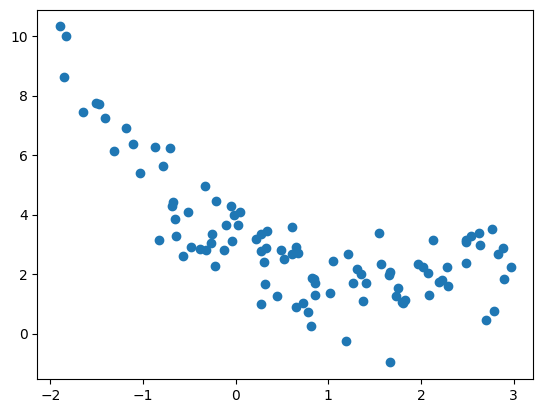

In [8]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=10)

In [12]:
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [13]:
from sklearn.linear_model import Lasso

In [14]:
from mlxtend.evaluate import bias_variance_decomp

In [15]:
alpha=np.linspace(0,30,100)
loss=[]
bias=[]
variance=[]

for i in alpha:
    Reg=Lasso(alpha=i)
    avg_expected_loss,avg_bias,avg_variance=bias_variance_decomp(
        Reg,X_train,y_train,X_test,y_test,
        loss='mse',
        random_seed=123)
    
    
    loss.append(avg_expected_loss)  
    bias.append(avg_bias)
    variance.append(avg_variance)
    

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

In [3]:
import matplotlib.pyplot as plt

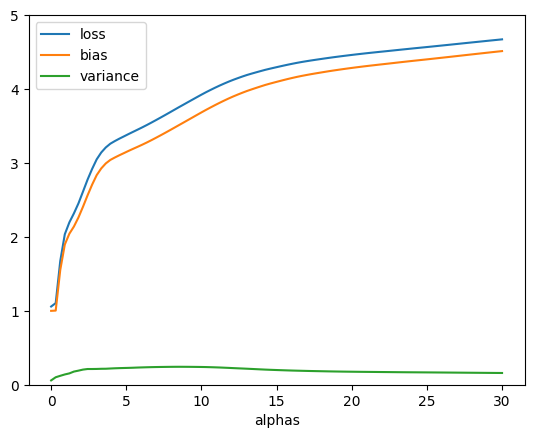

In [16]:
plt.plot(alpha,loss,label='loss')
plt.plot(alpha,bias,label='bias')
plt.plot(alpha,variance,label='variance')
plt.ylim(0,5)
plt.xlabel('alphas')
plt.legend()

In [ ]:
# effect of regularization on loss function 

In [17]:
from sklearn.datasets import make_regression


LinearRegression()

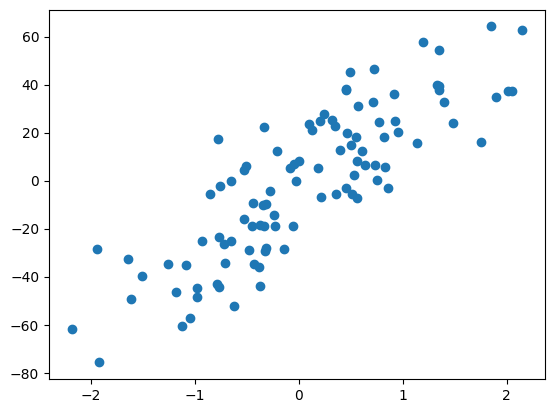

In [18]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(x,y)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

In [19]:
def loss(alpha,m):
    return np.sum((y-m*x.ravel()+2.29)**2) + alpha *m*m

In [20]:
def predict(m):
    return (m* x - 2.29)

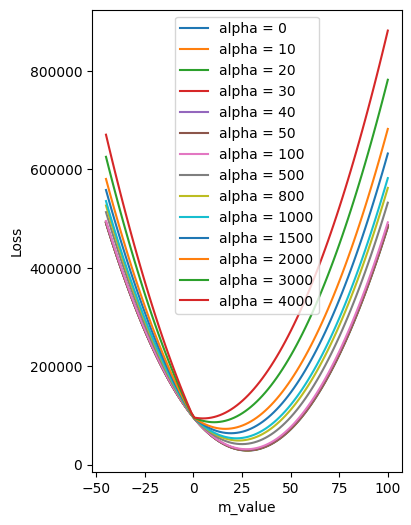

In [33]:
def cal_loss(m,alpha):
    return np.sum((y - m*x.ravel() + 2.29)**2) + alpha*abs(m)
def predict(m):
    return m*x - 2.29
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100,500,800,1000,1500,2000,3000,4000]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m_value')
plt.ylabel('Loss')
plt.show()